<a href="https://colab.research.google.com/github/phong516/AI_Course/blob/main/week6/ex2TemperatureController.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f5953e32515d4ce6cfd8cae4d2b5326a3100b92c20c9dae61dcbc83505cd1438
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [5]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

156.2295405449805


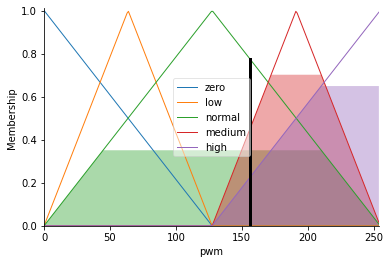

In [6]:
sensor = ctrl.Antecedent(np.arange(-3, 61, 1), 'sensor')
#sensor.automf(5, names = ['cold', 'cool', 'average', 'warm', 'hot'])
sensor['cold'] = fuzz.trimf(sensor.universe, [-3, -3, 31.5])
sensor['cool'] = fuzz.trimf(sensor.universe, [-3, 17.25, 31.5])
sensor['average'] = fuzz.trimf(sensor.universe, [-3, 31.5, 60])
sensor['warm'] = fuzz.trimf(sensor.universe, [31.5, 45.75, 60])
sensor['hot'] = fuzz.trimf(sensor.universe, [31.5, 60, 60])


setPoint = ctrl.Antecedent(np.arange(12, 33, 1), 'setPoint')
setPoint.automf(3, names = ['low', 'med', 'high'])

pwm = ctrl.Consequent(np.arange(0, 255, 1), 'pwm')
#pwm.automf(5, names = ['zero', 'low', 'normal', 'medium', 'high'])
pwm['zero'] = fuzz.trimf(pwm.universe, [0, 0, 127.5])
pwm['low'] = fuzz.trimf(pwm.universe, [0, 63.75, 127.5])
pwm['normal'] = fuzz.trimf(pwm.universe, [0, 127.5, 255])
pwm['medium'] = fuzz.trimf(pwm.universe, [127.5, 191.25, 255])
pwm['high'] = fuzz.trimf(pwm.universe, [127.5, 255, 255])

'''sensor.view()
setPoint.view()
pwm.view()

plt.show()'''

rule1 = ctrl.Rule(sensor['cold'] & (setPoint['low'] | setPoint['med'] | setPoint['high']), pwm['zero'])
rule2 = ctrl.Rule(sensor['hot'] & (setPoint['low'] | setPoint['med'] | setPoint['high']), pwm['high'])
rule3 = ctrl.Rule(setPoint['low'] & sensor['cool'], pwm['normal'])
rule4 = ctrl.Rule(setPoint['med'] & sensor['cool'], pwm['low'])
rule5 = ctrl.Rule(setPoint['high'] & sensor['cool'], pwm['zero'])
rule6 = ctrl.Rule(setPoint['low'] & sensor['average'], pwm['medium'])
rule7 = ctrl.Rule(setPoint['med'] & sensor['average'], pwm['normal'])
rule8 = ctrl.Rule(setPoint['high'] & sensor['average'], pwm['low'])
rule9 = ctrl.Rule(setPoint['low'] & sensor['warm'], pwm['high'])
rule10 = ctrl.Rule(setPoint['med'] & sensor['warm'], pwm['medium'])
rule11 = ctrl.Rule(setPoint['high'] & sensor['warm'], pwm['normal'])

rule = []
for i in range(1, 12):
    rule.append(locals()["rule" + str(i)])

pwmCtrl = ctrl.ControlSystem(rule)
pwmSimu = ctrl.ControlSystemSimulation(pwmCtrl)

pwmSimu.input['sensor'] =   50
pwmSimu.input['setPoint'] = 20
pwmSimu.compute()
print(pwmSimu.output['pwm'])
pwm.view(sim = pwmSimu)
plt.show()